# 🧪 Taller - Segmentando el Mundo: Binarización y Reconocimiento de Formas

In [1]:
# 🔧 Instalar librerías necesarias
!pip install opencv-python-headless matplotlib numpy

   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB 1.3 MB/s eta 0:00:31
    --------------------------------------- 0.8/39.4 MB 13.2 MB/s eta 0:00:03
   -- ------------------------------------- 2.7/39.4 MB 24.6 MB/s eta 0:00:02
   ---- ----------------------------------- 4.6/39.4 MB 29.6 MB/s eta 0:00:02
   ------ --------------------------------- 6.6/39.4 MB 32.4 MB/s eta 0:00:02
   -------- ------------------------------- 8.6/39.4 MB 34.3 MB/s eta 0:00:01
   ---------- ----------------------------- 10.3/39.4 MB 38.5 MB/s eta 0:00:01
   ------------ --------------------------- 12.0/39.4 MB 40.9 MB/s eta 0:00:01
   -------------- ------------------------- 13.9/39.4 MB 40.9 MB/s eta 0:00:01
   --------------- ------------------------ 15.8/39.4 MB 40.9 MB/s eta 0:00:01
   ----------------- ---------------------- 17.2/39.4 MB 38.6 MB/s eta 0:00:01
   ------------------- -------------------- 19.3/39.4 MB 38.6 MB/s e


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 📥 Cargar imagen en escala de grises

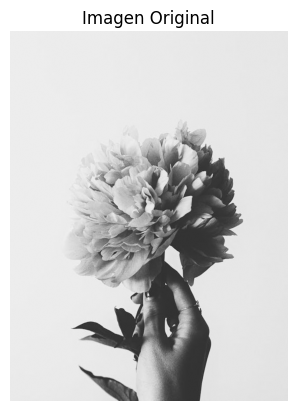

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔽 Reemplaza esto con la ruta de tu imagen (por ejemplo, desde Google Drive o una URL descargada)
ruta_imagen = '../datos/mano.jpg'  # ← cambia esto
img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

## 🔍 Segmentación binaria: Umbral fijo y adaptativo

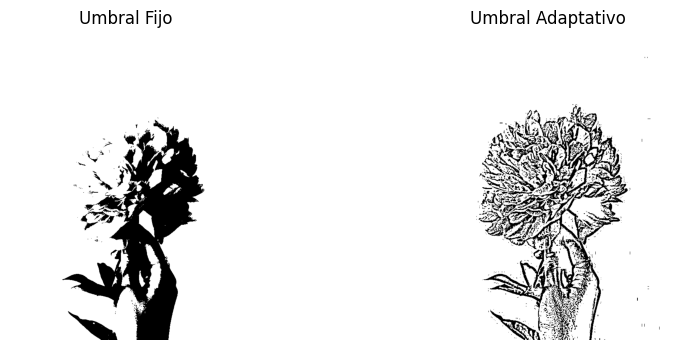

In [3]:
# Umbral fijo
_, binary_fixed = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Umbral adaptativo
binary_adapt = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, blockSize=11, C=2
)

# Mostrar ambos resultados
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(binary_fixed, cmap='gray')
axs[0].set_title('Umbral Fijo')
axs[0].axis('off')
axs[1].imshow(binary_adapt, cmap='gray')
axs[1].set_title('Umbral Adaptativo')
axs[1].axis('off')
plt.show()

## 🧭 Detección de contornos

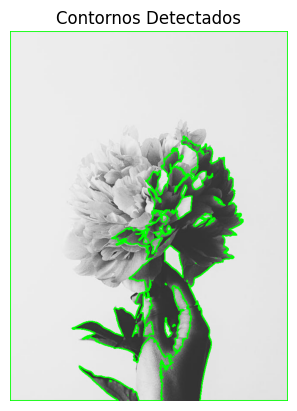

In [4]:
contours, _ = cv2.findContours(binary_fixed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

for c in contours:
    cv2.drawContours(img_contours, [c], -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Contornos Detectados')
plt.axis('off')
plt.show()

## 📌 Centro de masa y bounding boxes

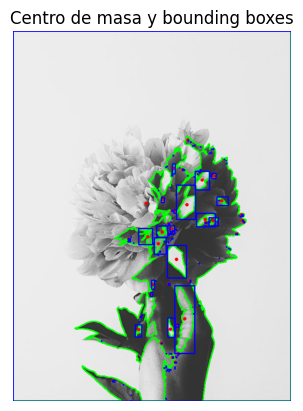

In [5]:
img_shapes = img_contours.copy()
areas = []
perimeters = []

for c in contours:
    M = cv2.moments(c)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.circle(img_shapes, (cx, cy), 4, (0, 0, 255), -1)
    
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img_shapes, (x, y), (x + w, y + h), (255, 0, 0), 2)

    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    areas.append(area)
    perimeters.append(perimeter)

plt.imshow(cv2.cvtColor(img_shapes, cv2.COLOR_BGR2RGB))
plt.title('Centro de masa y bounding boxes')
plt.axis('off')
plt.show()

## 📊 Métricas básicas

In [6]:
num_formas = len(contours)
area_prom = np.mean(areas)
perimetro_prom = np.mean(perimeters)

print(f"Número de formas detectadas: {num_formas}")
print(f"Área promedio: {area_prom:.2f}")
print(f"Perímetro promedio: {perimetro_prom:.2f}")

Número de formas detectadas: 131
Área promedio: 3506.42
Perímetro promedio: 77.58
